<a href="https://colab.research.google.com/github/sweskr/Practice-works/blob/main/Extracting_and_Forecasting_Economics_Data_from_FRED_using_Python_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2926735258.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df = df.set_index('Year').resample('Y').mean().dropna()


 Mean Squared Error: 53994254272527144583168.00


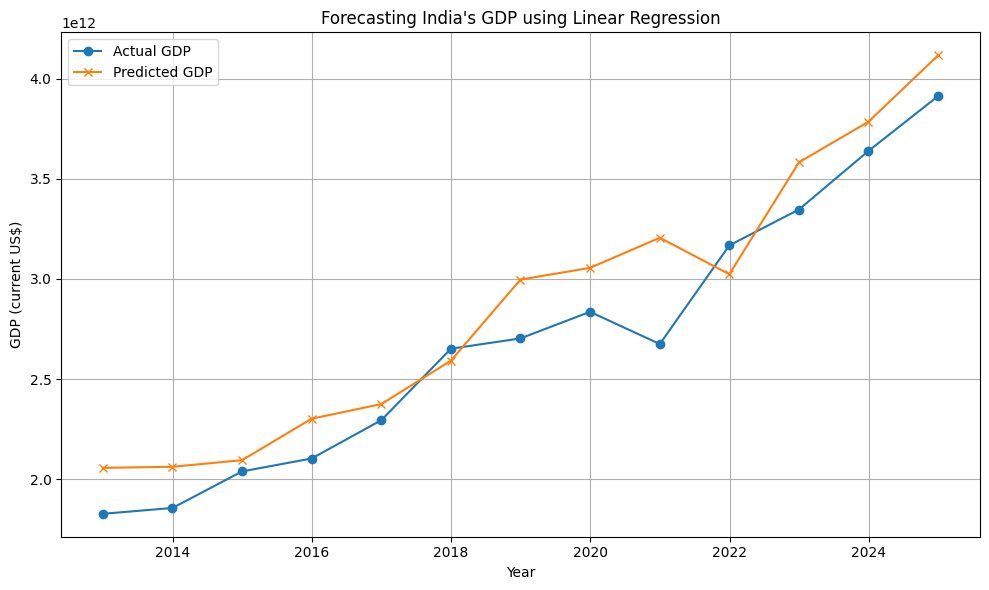

In [7]:
#  Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from fredapi import Fred

#  Connect to FRED using your API key
fred = Fred(api_key='1ef7c7b03978b102d6a42728d6520838 ')

#  Download India's GDP data (annual, current US$)
gdp_india = fred.get_series('MKTGDPINA646NWDB')  # Gross Domestic Product for India

#  Prepare the DataFrame
df = gdp_india.to_frame(name='GDP')
df.index.name = 'Year'
df.reset_index(inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.set_index('Year').resample('Y').mean().dropna()

#  Create lagged features
df['GDP_lag1'] = df['GDP'].shift(1)
df.dropna(inplace=True)

# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train = train[['GDP_lag1']]
y_train = train['GDP']
X_test = test[['GDP_lag1']]
y_test = test['GDP']

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#  Make Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
print(f" Mean Squared Error: {mse:.2f}")

# Plot Actual vs Predicted GDP
plt.figure(figsize=(10,6))
plt.plot(test.index, y_test, label='Actual GDP', marker='o')
plt.plot(test.index, y_pred, label='Predicted GDP', marker='x')
plt.title("Forecasting India's GDP using Linear Regression")
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
